In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_json('loan_data.json')

In [3]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


# Task 1

Find % of total applicants for each unique value of dependents.

In [4]:
df.shape

(511, 10)

In [5]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [6]:
(df['Dependents'].value_counts(normalize=True))*100

0     57.534247
2     17.221135
1     16.634051
3+     8.610568
Name: Dependents, dtype: float64

# Task 2
Find the %of applications approved for self-employed applicants.

In [7]:
df.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df.Application_Status.unique()


array(['Y', 'N'], dtype=object)

In [9]:
(np.count_nonzero(np.where((df['Self_Employed'] == "Yes") & (df['Application_Status'] == "Y")))/df['Application_Status'].count())*100


9.001956947162427

OR, Better way to do this is

In [10]:
df.value_counts(subset = ['Self_Employed', 'Application_Status'], normalize=True)["Yes","Y"]*100

9.001956947162427

# Task 3
What is the % of rejections for married male applicants?

In [11]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [12]:
df.Married.unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df.value_counts(subset = ['Gender', 'Married','Application_Status'], normalize=True)["Male","Yes","N"]*100

17.025440313111545

# Task 4
Which property area has the maximum approval ratio.


In [14]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [15]:
(df.value_counts(subset = ['Application_Status','Property_Area'], normalize=True)['Y'])

Property_Area
Semiurban    0.299413
Urban        0.203523
Rural        0.176125
dtype: float64

In [16]:
print("The Property Area which has the maximum approval ratio is Semiurban")

The Property Area which has the maximum approval ratio is Semiurban


# Task 5
Find average number of dependents per income group.

In [17]:
df.Income.unique()

array(['medium', 'low', 'high'], dtype=object)

In [18]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [19]:
arr_low = df.value_counts(subset = ['Income','Dependents'])['low']
arr_medium = df.value_counts(subset = ['Income','Dependents'])['medium']
arr_high= df.value_counts(subset = ['Income','Dependents'])['high']

In [20]:
sum = 0
for i in range(len(arr_low)):
    sum = sum + arr_low[i]*i
    
print("The average number of dependents for 'low' income group is",sum/arr_low.sum())

The average number of dependents for 'low' income group is 0.6410256410256411


In [21]:
sum = 0
for i in range(len(arr_medium)):
    sum = sum + arr_medium[i]*i
    
print("The average number of dependents for 'medium' income group is",sum/arr_medium.sum())

The average number of dependents for 'medium' income group is 0.8652849740932642


In [22]:
sum = 0
for i in range(len(arr_high)):
    sum = sum + arr_high[i]*i
    
print("The average number of dependents for 'high' income group is",sum/arr_high.sum())

The average number of dependents for 'high' income group is 0.8888888888888888


# Task 6
Find approval ratio for various combinations of Property_Area and Marrital status.

In [23]:
df1 = df.value_counts(subset = ['Property_Area', 'Married'])

In [24]:
df2 = df.value_counts(subset = ['Application_Status','Property_Area', 'Married'])["Y"]

In [25]:
df1

Property_Area  Married
Semiurban      Yes        129
Urban          Yes        109
Rural          Yes         93
Semiurban      No          68
Rural          No          56
Urban          No          56
dtype: int64

In [26]:
df2

Property_Area  Married
Semiurban      Yes        106
Urban          Yes         74
Rural          Yes         56
Semiurban      No          47
Rural          No          34
Urban          No          30
dtype: int64

In [27]:
df2/df1

Property_Area  Married
Semiurban      Yes        0.821705
Urban          Yes        0.678899
Rural          Yes        0.602151
Semiurban      No         0.691176
Rural          No         0.607143
Urban          No         0.535714
dtype: float64

In [28]:
df3 = pd.DataFrame(df2/df1)
df3.columns = ['Approval ratio']
df3

,,Approval ratio
Property_Area,Married,
Semiurban,Yes,0.821705
Urban,Yes,0.678899
Rural,Yes,0.602151
Semiurban,No,0.691176
Rural,No,0.607143
Urban,No,0.535714


In [29]:
df1 = pd.DataFrame(df1)
df1.columns = ['# of applicants']
df1

,,# of applicants
Property_Area,Married,
Semiurban,Yes,129
Urban,Yes,109
Rural,Yes,93
Semiurban,No,68
Rural,No,56
Urban,No,56


In [30]:
result = pd.concat([df1, df3], axis=1, join='inner')

In [31]:
result.sort_values(by='Property_Area')

# of applicants  Approval ratio
Property_Area Married                                 
Rural         Yes                   93        0.602151
              No                    56        0.607143
Semiurban     Yes                  129        0.821705
              No                    68        0.691176
Urban         Yes                  109        0.678899
              No                    56        0.535714

# Task 7

Explorartory Data Analysis

In [32]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


In [33]:
df.tail()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y
510,LP002990,Female,No,0,Graduate,Yes,0,Semiurban,medium,N


In [34]:
df.shape

(511, 10)

In [35]:
df.columns

Index(['Application_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Income',
       'Application_Status'],
      dtype='object')

In [36]:
df.describe()

,Credit_History
count,511.000000
mean,0.843444
std,0.363738
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


By looking at the shape we know that there are total of 511 rows and from info, we can say there is no null values in the data

In [38]:
df.dtypes

Application_ID        object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
Credit_History         int64
Property_Area         object
Income                object
Application_Status    object
dtype: object

Now lets make a function to know how many types of values available in the column

In [39]:
def explore_obj_Type(df, feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

In [40]:
for i in df.columns:
    if df[i].dtype == 'object':
        print('\n'+str(i) + '\'s Values with count are: ')
        explore_obj_Type(df, str(i))


Application_ID's Values with count are: 
LP001002    1
LP002300    1
LP002342    1
LP002341    1
LP002337    1
           ..
LP001665    1
LP001664    1
LP001658    1
LP001657    1
LP002990    1
Name: Application_ID, Length: 511, dtype: int64

Gender's Values with count are: 
Male      420
Female     91
Name: Gender, dtype: int64

Married's Values with count are: 
Yes    331
No     180
Name: Married, dtype: int64

Dependents's Values with count are: 
0     294
2      88
1      85
3+     44
Name: Dependents, dtype: int64

Education's Values with count are: 
Graduate        401
Not Graduate    110
Name: Education, dtype: int64

Self_Employed's Values with count are: 
No     441
Yes     70
Name: Self_Employed, dtype: int64

Property_Area's Values with count are: 
Semiurban    197
Urban        165
Rural        149
Name: Property_Area, dtype: int64

Income's Values with count are: 
low       273
medium    193
high       45
Name: Income, dtype: int64

Application_Status's Values with count 

Now we need to convert Categorical variable with Numerical Values

In [41]:
df.Gender.replace(['Male','Female'],[1,0], inplace=True)

In [42]:
df.Married.replace(['Yes','No'],[1,0], inplace=True)

In [43]:
df.Education.replace(['Graduate','Not Graduate'],[1,0], inplace=True)

In [44]:
df.Self_Employed.replace(['Yes','No'],[1,0], inplace=True)

In [45]:
df.Application_Status.replace(['Y','N'],[1,0], inplace=True)

In [46]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,1,0,0,1,0,1,Urban,medium,1
1,LP001003,1,1,1,1,0,1,Rural,medium,0
2,LP001005,1,1,0,1,1,1,Urban,low,1
3,LP001006,1,1,0,0,0,1,Urban,low,1
4,LP001008,1,0,0,1,0,1,Urban,medium,1


Here as Property_Area, Dependents and Income has multiple values we cant convert them directly

In [47]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Income', 'Dependents']

le = LabelEncoder()
for col in feature_col:
    df[col] = le.fit_transform(df[col])

In [48]:
df.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,1,0,0,1,0,1,2,2,1
1,LP001003,1,1,1,1,0,1,0,2,0
2,LP001005,1,1,0,1,1,1,2,1,1
3,LP001006,1,1,0,0,0,1,2,1,1
4,LP001008,1,0,0,1,0,1,2,2,1


In [49]:
df.tail()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,LP002978,0,0,0,1,0,1,0,1,1
507,LP002979,1,1,3,1,0,1,0,2,1
508,LP002983,1,1,1,1,0,1,2,2,1
509,LP002984,1,1,2,1,0,1,2,2,1
510,LP002990,0,0,0,1,1,0,1,2,0


Data Visualizations

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('dark')

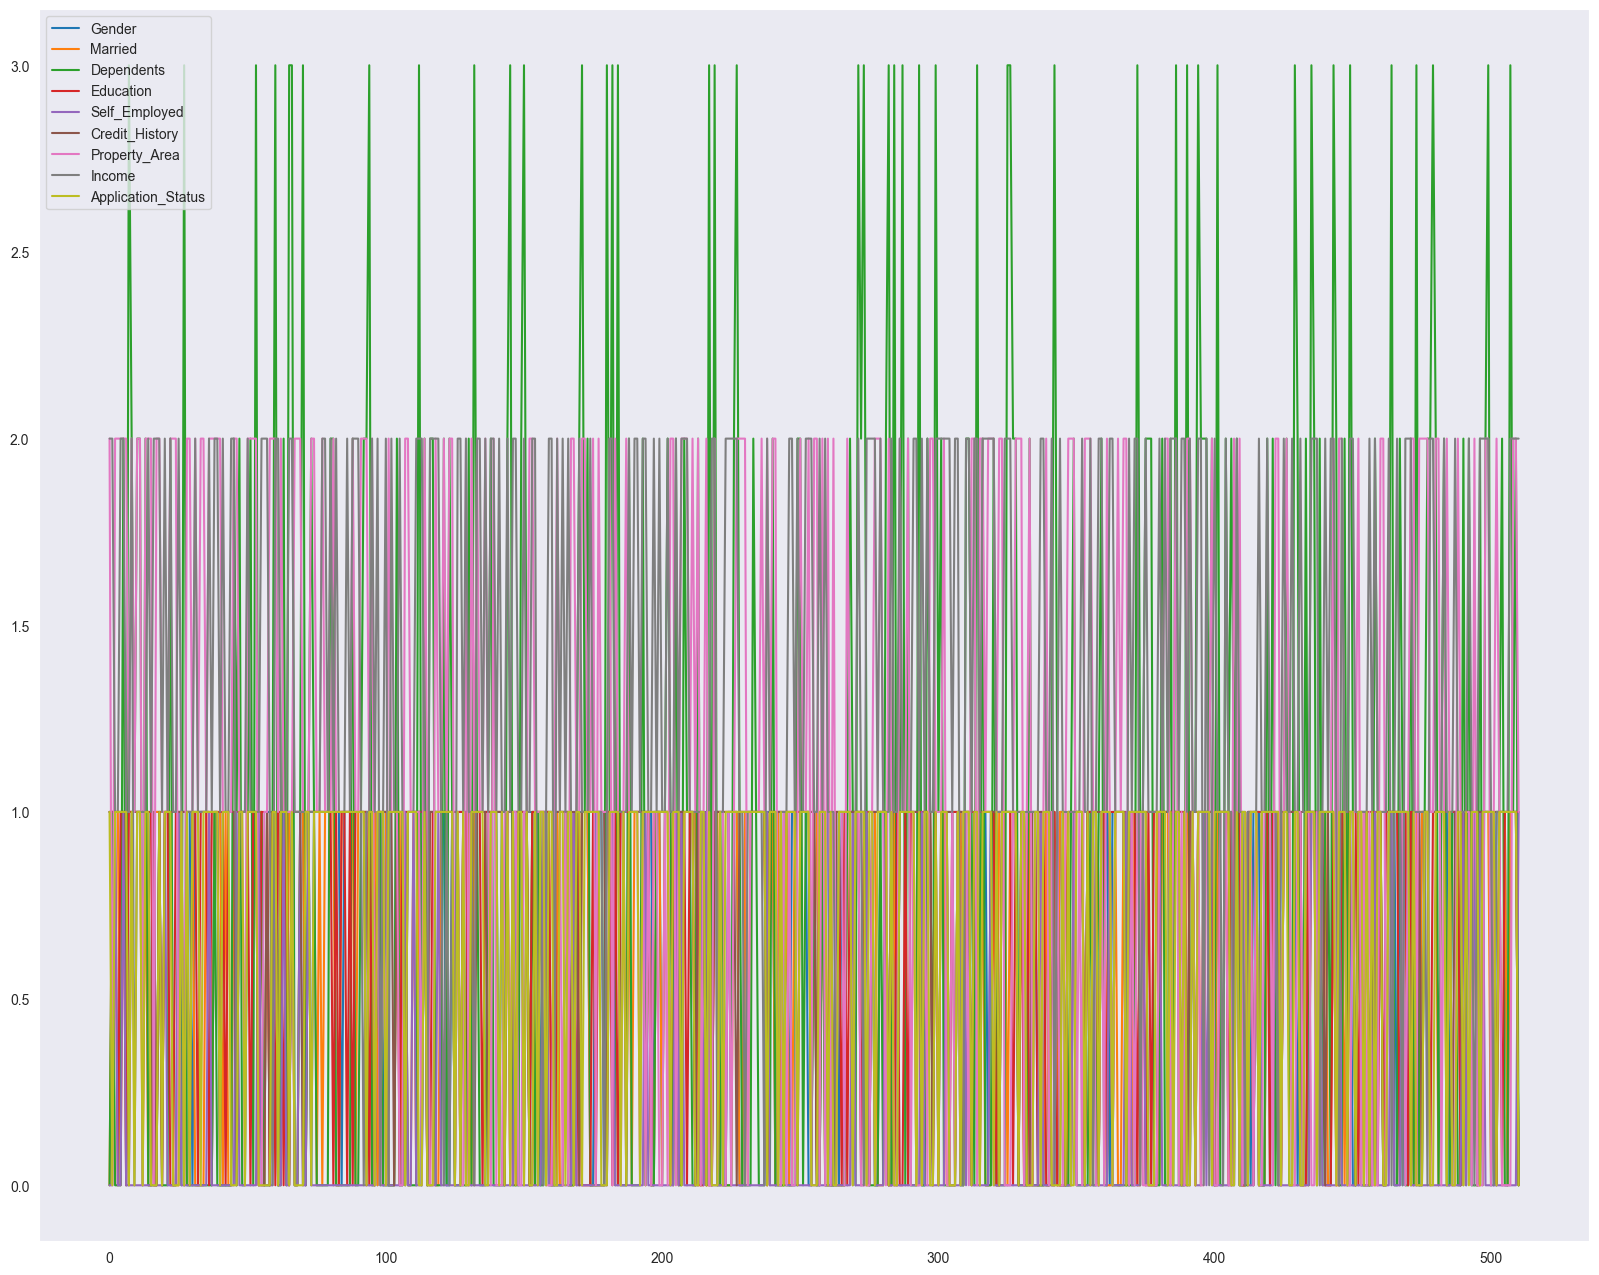

In [51]:
df.plot(figsize=(20,16))
plt.show()


Text(0.5, 1.0, 'Loan Application Amount')

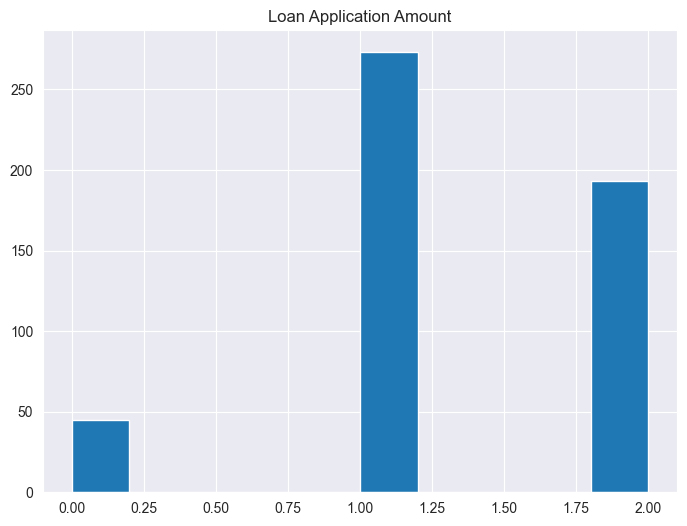

In [52]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)

df['Income'].hist(bins=10)
plt.title("Loan Application Amount")


C:\Users\tyagi\AppData\Local\Temp\ipykernel_1256\2409257016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt = '.1f', linewidth = 1)


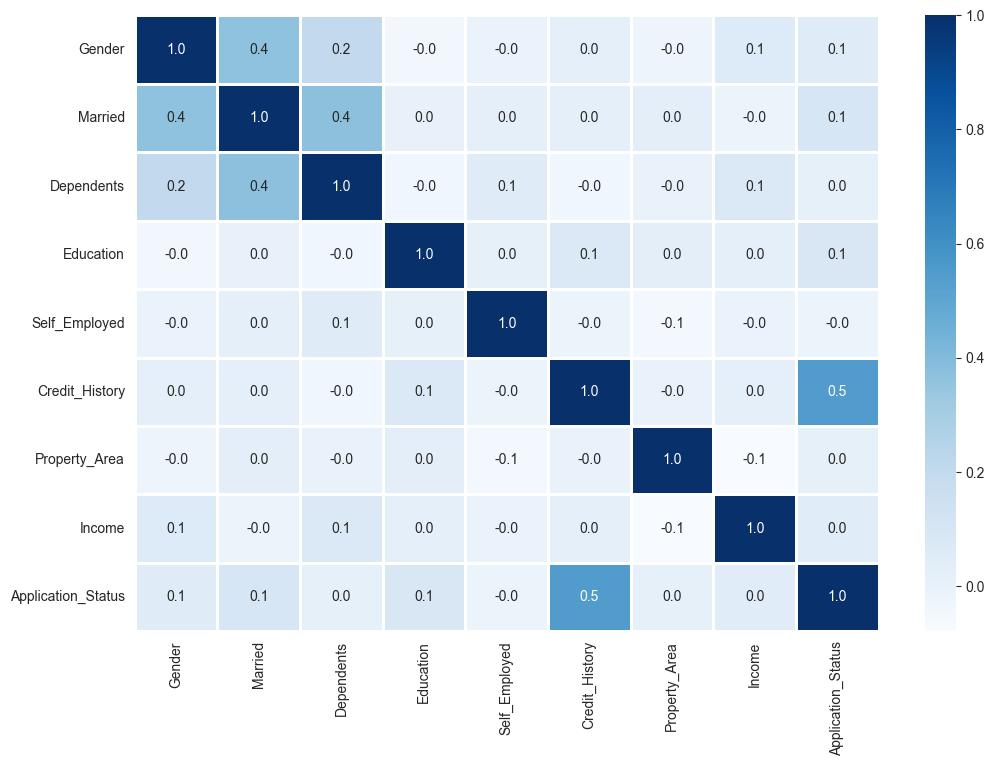

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt = '.1f', linewidth = 1)
plt.show()

Splitting the Data

In [54]:
X = df.drop(['Application_Status', 'Application_ID', 'Dependents', 'Self_Employed', 'Property_Area','Income'], axis=1)
# from heatmap, we only take the column, which really change the output in some way
y = df.Application_Status

In [55]:
X.ndim

2

In [56]:
y.ndim

1

In [57]:
X

,Gender,Married,Education,Credit_History
0,1,0,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,0,1
4,1,0,1,1
...,...,...,...,...
506,0,0,1,1
507,1,1,1,1
508,1,1,1,1
509,1,1,1,1


In [58]:
y

0      1
1      0
2      1
3      1
4      1
      ..
506    1
507    1
508    1
509    1
510    0
Name: Application_Status, Length: 511, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# accuracy on the training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [62]:
print('Accuracy on the training data: ', training_data_accuracy)

Accuracy on the training data:  0.814621409921671


In [63]:
# accuracy on the test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [64]:
print('Accuracy on the test data: ', test_data_accuracy)

Accuracy on the test data:  0.7890625
